<a href="https://colab.research.google.com/github/BVika/Machine_learning_methods/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_5_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ практика 5. Задача регрессии

## **Цель занятия:**
Изучить задачу регрессии, познакомиться с метриками качества, реализовать модель для решения задачи с использованием разных моделей.

## **Задание состоит из следующих частей:**
1. Понимание значимости отбора признаков
2. Обучение регрессии
3. Метирки качества для регресии (только самые важные)
4. Регулязризация

## Задачи для домашки ⏰

1. Выбрать y = непрерывная переменая y= SBP_50
2. Разделить на обучающую, тестовую и валидационную выборки
3. Выбрать лучшие признаки для X и выбрать лучший результат
4. Объяснить результаты метрик качества MAE, MSE, R2

Давайте подробно разберем значения показателей, которые вы привели:


* MAE (средняя абсолютная ошибка) измеряет среднюю абсолютную разницу между предсказанными и фактическими значениями. Значение 8.67 указывает на то, что в среднем предсказания модели отличаются от реальных значений на 8.67 единиц. Меньшее значение MAE указывает на более точные предсказания, и в данном случае это говорит о том, что модель работает довольно хорошо.
* MSE (средняя квадратичная ошибка) измеряет среднее значение квадратов ошибок (разностей между предсказанными и фактическими значениями). Значение 118.91 означает, что ошибки модели в квадрате в среднем составляют 118.91. MSE более чувствителен к большим ошибкам, чем MAE, так как ошибки возводятся в квадрат. В данном случае значение MSE также говорит о том, что модель имеет приемлемую точность.
* R^2 Score (коэффициент детерминации) показывает, какую долю вариации целевой переменной объясняет модель. Значение 0.44 указывает на то, что модель объясняет 44% вариации в целевой переменной. Это значение считается умеренным: модель объясняет значительную долю вариации, но есть еще место для улучшения. В идеале R^2 должен быть близок к 1, что указывает на то, что модель хорошо объясняет данные.

**Для 👽**
5. Попробовать модель ```KNeighborsRegressor```, объяснить как работает модель, объяснить результат
6. Попробовать модель ```DecisionTreeRegressor```, объяснить как работает модель, объяснить результат

In [ ]:
! pip install pandas scikit-learn seaborn scipy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
try:
    df = pd.read_csv('/content/heart.csv')
except FileNotFoundError:
    df = pd.read_csv('heart.csv')
df['SBP_50'] = df['SBP_50'].astype('float')

df['DEATH'] = df['DEATH'].astype('object')
df['DBP_50'] = df['DBP_50'].astype('float')
df['CHOL_50'] = df['CHOL_50'].astype('float')
df['HT_50'] = df['HT_50'].astype('float')
y = df['SBP_50'] # выбираем целевую переменную (количественная)
X = df.drop('SBP_50', axis=1) # переменные для проверки влияния

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE_50     200 non-null    int64  
 1   MD_50      200 non-null    int64  
 2   SBP_50     200 non-null    float64
 3   DBP_50     200 non-null    float64
 4   HT_50      200 non-null    float64
 5   WT_50      200 non-null    int64  
 6   CHOL_50    200 non-null    float64
 7   SES        200 non-null    int64  
 8   CL_STATUS  200 non-null    int64  
 9   MD_62      200 non-null    int64  
 10  SBP_62     200 non-null    int64  
 11  DBP_62     200 non-null    int64  
 12  CHOL_62    200 non-null    int64  
 13  WT_62      200 non-null    int64  
 14  IHD_DX     200 non-null    int64  
 15  DEATH      200 non-null    object 
dtypes: float64(4), int64(11), object(1)
memory usage: 25.1+ KB


In [ ]:
X

,AGE_50,MD_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,42,1,65.0,64.0,147,291.0,2,8,4,120,78,271,146,2,1
1,53,1,72.0,69.0,167,278.0,1,6,2,122,68,250,165,9,1
2,53,2,90.0,70.0,222,342.0,4,8,1,132,90,304,223,2,1
3,48,4,80.0,72.0,229,239.0,4,8,2,118,68,209,227,3,1
4,53,3,74.0,66.0,134,243.0,3,8,5,118,56,261,138,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,80.0,66.0,148,300.0,2,8,1,115,65,273,152,0,0
196,23,1,70.0,69.0,137,120.0,3,8,2,112,76,198,153,0,0
197,20,3,80.0,66.0,150,210.0,5,0,1,130,85,274,158,0,0
198,46,3,84.0,66.0,138,130.0,4,6,2,148,88,160,157,0,0


Преобразование категориальных переменных остается без изменений

In [ ]:
# Создаем копию данных

category_columns: list[str] = X.select_dtypes(include=['object']).columns # собираем колонки помеченные как object

# Применяем One-Hot Encoding к категориальным столбцам, исключая первую категорию (drop_first=True)
X = pd.get_dummies(X, columns=category_columns,drop_first=True)


In [ ]:
X

,AGE_50,MD_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH_1
0,42,1,65.0,64.0,147,291.0,2,8,4,120,78,271,146,2,True
1,53,1,72.0,69.0,167,278.0,1,6,2,122,68,250,165,9,True
2,53,2,90.0,70.0,222,342.0,4,8,1,132,90,304,223,2,True
3,48,4,80.0,72.0,229,239.0,4,8,2,118,68,209,227,3,True
4,53,3,74.0,66.0,134,243.0,3,8,5,118,56,261,138,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,80.0,66.0,148,300.0,2,8,1,115,65,273,152,0,False
196,23,1,70.0,69.0,137,120.0,3,8,2,112,76,198,153,0,False
197,20,3,80.0,66.0,150,210.0,5,0,1,130,85,274,158,0,False
198,46,3,84.0,66.0,138,130.0,4,6,2,148,88,160,157,0,False


In [ ]:
df_corr_test = X.copy() #создает копию объекта X и сохраняет его в переменной df_corr_test

# Добавляем целевую переменную в копию данных
df_corr_test['y'] = y
df_corr_test

,AGE_50,MD_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH_1,y
0,42,1,65.0,64.0,147,291.0,2,8,4,120,78,271,146,2,True,110.0
1,53,1,72.0,69.0,167,278.0,1,6,2,122,68,250,165,9,True,130.0
2,53,2,90.0,70.0,222,342.0,4,8,1,132,90,304,223,2,True,120.0
3,48,4,80.0,72.0,229,239.0,4,8,2,118,68,209,227,3,True,120.0
4,53,3,74.0,66.0,134,243.0,3,8,5,118,56,261,138,2,True,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,80.0,66.0,148,300.0,2,8,1,115,65,273,152,0,False,115.0
196,23,1,70.0,69.0,137,120.0,3,8,2,112,76,198,153,0,False,110.0
197,20,3,80.0,66.0,150,210.0,5,0,1,130,85,274,158,0,False,130.0
198,46,3,84.0,66.0,138,130.0,4,6,2,148,88,160,157,0,False,140.0


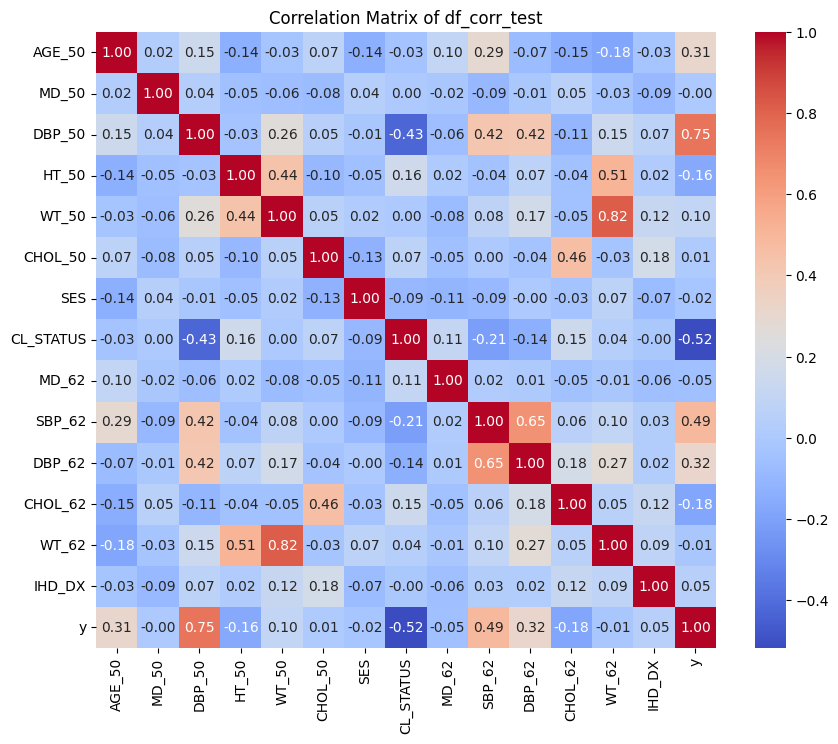

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть DataFrame под названием df_corr_test
# Выводим матрицу корреляции (только для числовых столбцов)
correlation_matrix = df_corr_test.select_dtypes(['int', 'float']).corr()
#df_corr_test.select_dtypes(['int', 'float']) выбирает только те столбцы из DataFrame df_corr_test, которые имеют типы данных int (целые числа) и float (числа с плавающей точкой).
#.corr() вычисляет матрицу корреляции для выбранных числовых столбцов. Результат сохраняется в переменной correlation_matrix.

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8)) # Создает новую фигуру для графика с заданными размерами (ширина 10  и высота 8 ).
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')#  создает тепловую карту на основе матрицы корреляции.
plt.title("Correlation Matrix of df_corr_test")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def resolve_regression(X, y, regularization=None):
    """
    Выполняет регрессию с учетом регуляризации.

    Parameters:
    - X: Входные данные (признаки).
    - y: Целевые значения.
    - regularization: Тип регуляризации ('l1', 'l2', None). Если None, используется обычная линейная регрессия.
    """
    # Разделение данных на обучающую и тестовую выборки (80% / 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso() # L1-регуляризация (Lasso)
    elif regularization == 'l2':
        model = Ridge() # L2-регуляризация (Ridge)
    else:
        model = LinearRegression() # Линейная регрессия без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    mae = mean_absolute_error(y_test, y_pred) # Средняя абсолютная ошибка
    mse = mean_squared_error(y_test, y_pred)  # Средняя квадратичная ошибка
    r2 = r2_score(y_test, y_pred)             # Коэффициент детерминации (R^2)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test

In [ ]:
resolve_regression(X, y)
None # Используем None (оператор ничего не делает) чтобы убрать вывод от return у функции resolve_regression. Пока он нам не нужен и и будет мешать


Regularization: None
Mean Absolute Error (MAE): 8.67
Mean Squared Error (MSE): 118.91
R^2 Score: 0.44


In [ ]:
resolve_regression(X[['DBP_50', 'CL_STATUS', 'SBP_62', 'DBP_62', 'AGE_50']], y)
None


Regularization: None
Mean Absolute Error (MAE): 8.27
Mean Squared Error (MSE): 106.22
R^2 Score: 0.50


MAE уменьшился на 0.40. Это говорит о том, что в среднем предсказания модели стали более точными, так как ошибка между предсказанными и фактическими значениями снизилась.

MSE уменьшился на 12.69. Это также указывает на улучшение модели, так как среднее значение квадратов ошибок стало меньше. Это означает, что модель стала лучше предсказывать значения, особенно в случае больших ошибок.

R^2 увеличился на 0.06. Это указывает на то, что модель теперь объясняет 50% вариации целевой переменной, что является улучшением по сравнению с предыдущими 44%. Это говорит о том, что модель стала более эффективной в объяснении данных.


Теперь попробуем оптимизировать числовые переменные и сделать тоже самое

In [ ]:
X

,AGE_50,MD_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH_1
0,42,1,65.0,64.0,147,291.0,2,8,4,120,78,271,146,2,True
1,53,1,72.0,69.0,167,278.0,1,6,2,122,68,250,165,9,True
2,53,2,90.0,70.0,222,342.0,4,8,1,132,90,304,223,2,True
3,48,4,80.0,72.0,229,239.0,4,8,2,118,68,209,227,3,True
4,53,3,74.0,66.0,134,243.0,3,8,5,118,56,261,138,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,80.0,66.0,148,300.0,2,8,1,115,65,273,152,0,False
196,23,1,70.0,69.0,137,120.0,3,8,2,112,76,198,153,0,False
197,20,3,80.0,66.0,150,210.0,5,0,1,130,85,274,158,0,False
198,46,3,84.0,66.0,138,130.0,4,6,2,148,88,160,157,0,False


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE_50     200 non-null    int64  
 1   MD_50      200 non-null    int64  
 2   DBP_50     200 non-null    float64
 3   HT_50      200 non-null    float64
 4   WT_50      200 non-null    int64  
 5   CHOL_50    200 non-null    float64
 6   SES        200 non-null    int64  
 7   CL_STATUS  200 non-null    int64  
 8   MD_62      200 non-null    int64  
 9   SBP_62     200 non-null    int64  
 10  DBP_62     200 non-null    int64  
 11  CHOL_62    200 non-null    int64  
 12  WT_62      200 non-null    int64  
 13  IHD_DX     200 non-null    int64  
 14  DEATH_1    200 non-null    bool   
dtypes: bool(1), float64(3), int64(11)
memory usage: 22.2 KB


Отбор признаков по корреляции

In [ ]:
import pandas as pd
import numpy as np

def select_features_correlation(X, y, max_features=5):
    # Вычисляем корреляцию признаков с целевой переменной
    correlation = X.apply(lambda col: np.abs(col.corr(y)))

    # Отбираем top-N признаков с наибольшей корреляцией
    top_features = correlation.nlargest(max_features).index

    # Возвращаем X и y с отобранными признаками
    return X[top_features], y


Отбор признаков с помощью RFE (Recursive Feature Elimination)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def select_features_rfe(X, y, max_features=5):
    # Инициализация модели линейной регрессии
    model = LinearRegression()

    # RFE с указанным количеством признаков
    selector = RFE(model, n_features_to_select=max_features)
    selector = selector.fit(X, y)

    # Отбор признаков
    selected_features = X.columns[selector.support_]

    # Возвращаем X и y с отобранными признаками
    return X[selected_features], y


In [ ]:
# Предположим, что у вас есть данные X и y
# Используем отбор на основе корреляции
X_selected_corr, y_selected_corr = select_features_correlation(X, y, max_features=5)

# Используем отбор с помощью RFE
X_selected_rfe, y_selected_rfe = select_features_rfe(X, y, max_features=5)


In [ ]:
resolve_regression(X_selected_corr, y_selected_corr)
None

Regularization: None
Mean Absolute Error (MAE): 8.27
Mean Squared Error (MSE): 106.22
R^2 Score: 0.50


In [ ]:
resolve_regression(X_selected_rfe, y_selected_rfe)
None

Regularization: None
Mean Absolute Error (MAE): 8.19
Mean Squared Error (MSE): 109.26
R^2 Score: 0.48


Regularization: None
Mean Absolute Error (MAE): 8.19
Mean Squared Error (MSE): 109.26
R^2 Score: 0.48


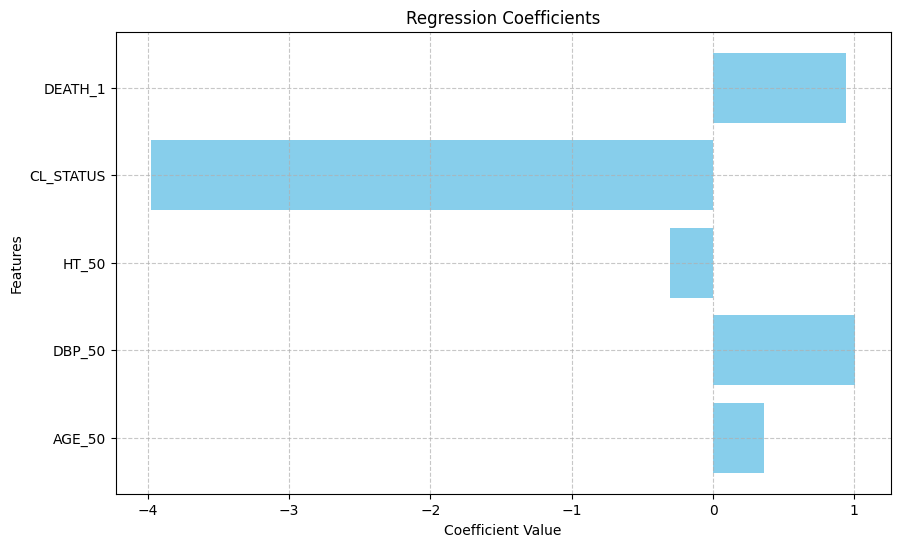

In [ ]:
import matplotlib.pyplot as plt

def plot_regression_coefficients(model, feature_names):
    # Извлекаем коэффициенты регрессии
    coefficients = model.coef_

    # Создаем столбчатую диаграмму для визуализации коэффициентов
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Regression Coefficients")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Пример использования:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe, None)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)


In [ ]:
X_selected_rfe

,AGE_50,DBP_50,HT_50,CL_STATUS,DEATH_1
0,42,65.0,64.0,8,True
1,53,72.0,69.0,6,True
2,53,90.0,70.0,8,True
3,48,80.0,72.0,8,True
4,53,74.0,66.0,8,True
...,...,...,...,...,...
195,50,80.0,66.0,8,False
196,23,70.0,69.0,8,False
197,20,80.0,66.0,0,False
198,46,84.0,66.0,6,False


In [ ]:


# Выбираем числовые признаки
numeric_features = X_selected_rfe.select_dtypes(include=['float64']).columns.tolist()
# ВНИМАНИЕ: тут отбираются только float, если у вас не категориальные признаки имеют тип int - нужно исправить (например, в ручную указать нужные столбцы)

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_selected_rfe.loc[:,numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])


In [ ]:
X_selected_rfe

,AGE_50,DBP_50,HT_50,CL_STATUS,DEATH_1
0,42,0.264706,0.214286,8,True
1,53,0.333333,0.571429,6,True
2,53,0.509804,0.642857,8,True
3,48,0.411765,0.785714,8,True
4,53,0.352941,0.357143,8,True
...,...,...,...,...,...
195,50,0.411765,0.357143,8,False
196,23,0.313725,0.571429,8,False
197,20,0.411765,0.357143,0,False
198,46,0.450980,0.357143,6,False


In [ ]:
 y_selected_rfe

,SBP_50
0,110.0
1,130.0
2,120.0
3,120.0
4,118.0
...,...
195,115.0
196,110.0
197,130.0
198,140.0


Regularization: None
Mean Absolute Error (MAE): 8.19
Mean Squared Error (MSE): 109.26
R^2 Score: 0.48


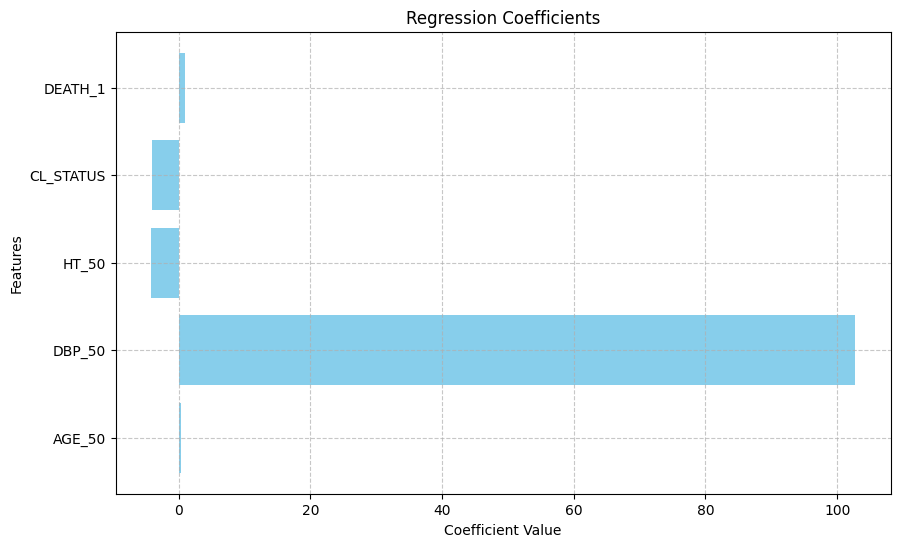

In [ ]:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)


## Пару слов про метрики

In [ ]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 8.19
Mean Squared Error (MSE): 109.26
R^2 Score: 0.48


Про метрики качества в регресии - https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii#regressiya

## Регуляризация

In [ ]:
X

,AGE_50,MD_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH_1
0,42,1,65.0,64.0,147,291.0,2,8,4,120,78,271,146,2,True
1,53,1,72.0,69.0,167,278.0,1,6,2,122,68,250,165,9,True
2,53,2,90.0,70.0,222,342.0,4,8,1,132,90,304,223,2,True
3,48,4,80.0,72.0,229,239.0,4,8,2,118,68,209,227,3,True
4,53,3,74.0,66.0,134,243.0,3,8,5,118,56,261,138,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,80.0,66.0,148,300.0,2,8,1,115,65,273,152,0,False
196,23,1,70.0,69.0,137,120.0,3,8,2,112,76,198,153,0,False
197,20,3,80.0,66.0,150,210.0,5,0,1,130,85,274,158,0,False
198,46,3,84.0,66.0,138,130.0,4,6,2,148,88,160,157,0,False


Про регуляризацию - https://yandex.ru/q/datascience/10672717313/

1. **L1-регуляризация (Lasso)**:
   Формула для L1-регуляризации добавляет штраф, который равен сумме абсолютных значений весов модели. Это может привести к обнулению некоторых весов, то есть к выбору только наиболее значимых признаков.

   Формула для L1-регуляризации:
   J(θ) = Функция потерь + λ * Σ|θ_i|

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Функция потерь — это функция, измеряющая ошибку модели (например, среднеквадратическая ошибка),
   - λ — коэффициент регуляризации, который контролирует степень штрафа,
   - Σ|θ_i| — сумма абсолютных значений всех весов модели (θ_i).

2. **L2-регуляризация (Ridge)**:
   Формула для L2-регуляризации добавляет штраф, который равен сумме квадратов весов модели. Это не обнуляет веса, но снижает их величину, что приводит к более простым и менее подверженным переобучению моделям.

   Формула для L2-регуляризации:
   J(θ) = Функция потерь + λ * Σθ_i^2

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Σθ_i^2 — сумма квадратов всех весов модели (θ_i).

3. **Elastic Net**:
   Это комбинированный метод, который использует и L1-штраф, и L2-штраф. Он полезен, когда нужно балансировать преимущества обоих методов.

   Формула для Elastic Net:
   J(θ) = Функция потерь + λ_1 * Σ|θ_i| + λ_2 * Σθ_i^2

   где:
   - λ_1 и λ_2 — коэффициенты регуляризации для L1 и L2 частей соответственно.

Регуляризация помогает улучшить обобщающую способность модели и предотвращает её переобучение.

Regularization: l1
Mean Absolute Error (MAE): 8.71
Mean Squared Error (MSE): 115.32
R^2 Score: 0.45


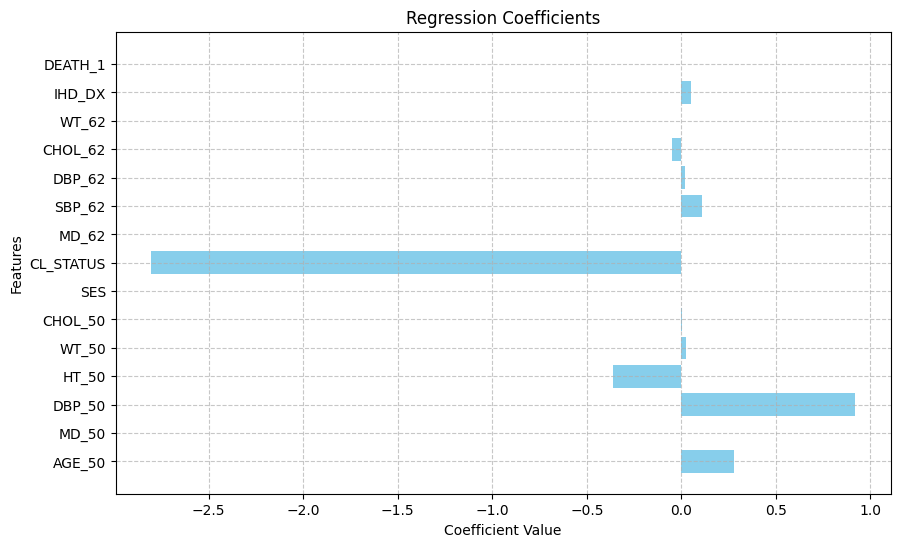

In [ ]:
# L1-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l1')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)


Regularization: l2
Mean Absolute Error (MAE): 8.68
Mean Squared Error (MSE): 118.95
R^2 Score: 0.44


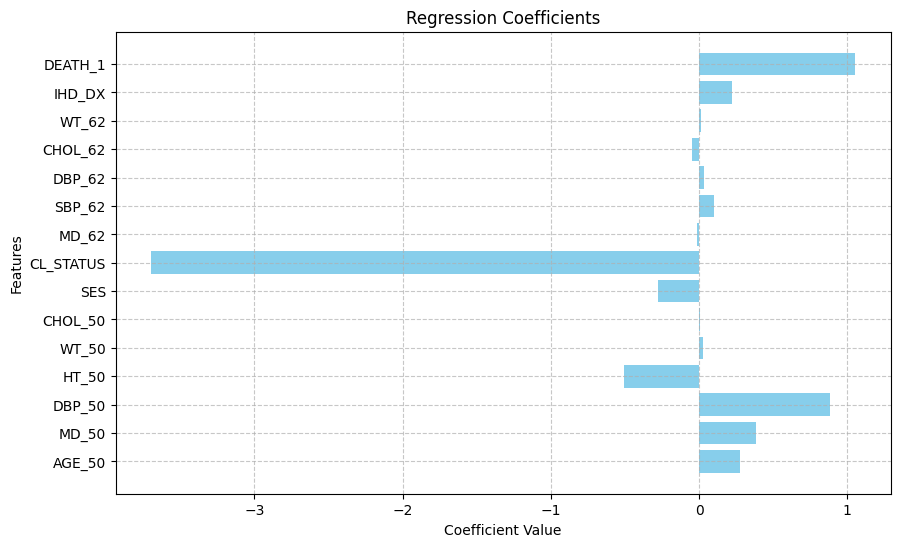

In [ ]:
# L2-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l2')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Regularization: None
Mean Absolute Error (MAE): 8.67
Mean Squared Error (MSE): 118.91
R^2 Score: 0.44


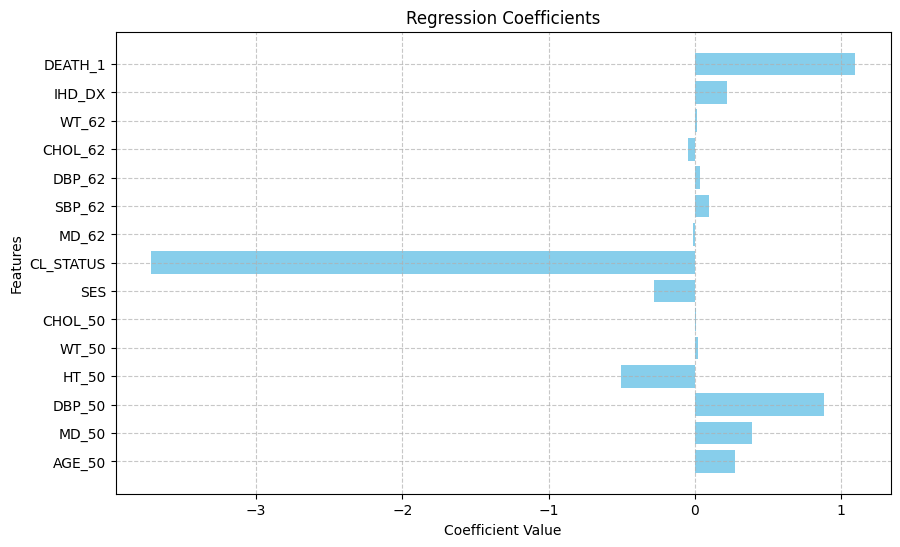

In [ ]:
# Без регуляризации
model, _, _, _, _  = resolve_regression(X, y, regularization=None)
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)


In [ ]:
X

,AGE_50,MD_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH_1
0,42,1,65.0,64.0,147,291.0,2,8,4,120,78,271,146,2,True
1,53,1,72.0,69.0,167,278.0,1,6,2,122,68,250,165,9,True
2,53,2,90.0,70.0,222,342.0,4,8,1,132,90,304,223,2,True
3,48,4,80.0,72.0,229,239.0,4,8,2,118,68,209,227,3,True
4,53,3,74.0,66.0,134,243.0,3,8,5,118,56,261,138,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,80.0,66.0,148,300.0,2,8,1,115,65,273,152,0,False
196,23,1,70.0,69.0,137,120.0,3,8,2,112,76,198,153,0,False
197,20,3,80.0,66.0,150,210.0,5,0,1,130,85,274,158,0,False
198,46,3,84.0,66.0,138,130.0,4,6,2,148,88,160,157,0,False


In [187]:
y


,SBP_50
0,110.0
1,130.0
2,120.0
3,120.0
4,118.0
...,...
195,115.0
196,110.0
197,130.0
198,140.0


In [189]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

def train_and_evaluate_knn(X, y, k=5, test_size=0.2, random_state=42):
    """
    Обучает модель KNeighborsRegressor и оценивает её производительность.

    Параметры:
    X : DataFrame
        Признаки (входные данные).
    y : Series
        Целевая переменная (выходные данные).
    k : int, optional
        Число ближайших соседей (по умолчанию 5).

    test_size : float, optional
        Доля тестовой выборки (по умолчанию 0.2).
    random_state : int, optional
        Случайное состояние для воспроизводимости (по умолчанию 42).

    Возвращает:
    float
        Средняя квадратичная ошибка (MSE) модели.
    """

    # Разделяем данные на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Нормализуем числовые признаки
    #numeric_features = X_train.select_dtypes(include=['float64', 'int']).columns.tolist()
    #scaler = MinMaxScaler()
    #X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
    #X_test[numeric_features] = scaler.transform(X_test[numeric_features])

    # Инициализируем и обучаем модель
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Делаем предсказания
    y_pred = knn.predict(X_test)

    # Оценка модели
    mse = mean_squared_error(y_test, y_pred)
    #r2 = r2_score(y_test, y_pred)


# Вы можете вызвать функцию следующим образом:
mse = train_and_evaluate_knn(X_selected_rfe, y_selected_rfe)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: None



MSE равно 176.82, что указывает на то, что в среднем квадраты ошибок между предсказанными и фактическими значениями составляют около 176.82. так как целевая переменная (например, цена дома) варьируется от 88 до 210, то MSE в 176.82 может быть приемлемым.

Важно нормализовать данные перед использованием KNeighborsRegressor, так как модель чувствительна к масштабам признаков. Если один признак имеет значительно больший диапазон значений, чем другие, это может повлиять на расстояния между точками и, как следствие, на предсказания.

Влияние k:

Значение k может значительно влиять на производительность модели. Малые значения k могут привести к переобучению (модель слишком чувствительна к шуму в данных), в то время как большие значения могут привести к недообучению (модель игнорирует важные детали).